In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from catboost import CatBoostClassifier, Pool
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import f1_score, roc_auc_score, precision_score, recall_score, classification_report

In [ ]:
df = pd.read_csv('train_data/trnsctns_ops_trn.csv',encoding="cp1251",sep=";")
#df = df.drop(columns=['Unnamed: 0'], errors='ignore')
#df = df.drop_duplicates()
#df = df.dropna()
df

In [ ]:
df = pd.read_csv('train_data/cntrbtrs_clnts_ops_trn.csv',encoding="cp1251",sep=";")
#df = df.drop(columns=['Unnamed: 0'], errors='ignore')
#df = df.drop_duplicates()
#df = df.dropna()
df

In [7]:
df= df.drop(columns=['clnt_id','accnt_id'], errors='ignore')
df

,slctn_nmbr,gndr,brth_yr,prsnt_age,accnt_bgn_date,cprtn_prd_d,erly_pnsn_flg,accnt_status,pnsn_age,prvs_npf,...,dstrct,city,sttlmnt,pstl_code,okato,phn,email,lk,assgn_npo,assgn_ops
0,0,ж,1960,64,2005-12-21,96,0,Накопительный период,55,СФР,...,NaN,ОМСК Г,NaN,644001,5.200000e+10,нет,нет,нет,нет,нет
1,0,м,1954,70,2009-06-29,283,0,Накопительный период,60,СФР,...,NaN,БЕЛОГОРСК Г,NaN,676852,1.000000e+10,нет,нет,нет,нет,нет
2,3,м,1955,69,2006-12-25,88,0,Накопительный период,60,СФР,...,NaN,NaN,NaN,109451,4.500000e+10,нет,нет,нет,нет,нет
3,2,ж,1962,62,2013-09-03,1301,0,Накопительный период,55,NaN,...,АЛЬМЕТЬЕВСКИЙ Р-Н,АЛЬМЕТЬЕВСК Г,NaN,423464,9.200000e+10,нет,нет,нет,нет,нет
4,2,м,1955,69,2010-12-06,106,0,Накопительный период,60,СФР,...,ВОТКИНСКИЙ Р-Н,NaN,МОЛЧАНЫ Д,427415,9.400000e+10,нет,нет,нет,нет,нет
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532820,0,ж,1965,59,2013-12-23,490,0,Накопительный период,56,СФР,...,NaN,НИЖНИЙ НОВГОРОД Г,NaN,603070,2.200000e+10,нет,нет,нет,нет,нет
532821,3,м,1956,68,2008-05-28,307,0,Накопительный период,60,СФР,...,NaN,ПЕТРОЗАВОДСК Г,NaN,185030,8.600000e+10,нет,нет,нет,нет,нет
532822,0,м,1959,65,2010-12-15,97,0,Накопительный период,60,СФР,...,ЧИШМИНСКИЙ Р-Н,NaN,АЛКИНО-2 С,452155,8.000000e+10,нет,нет,нет,нет,нет
532823,0,ж,1959,65,2010-11-03,139,0,Накопительный период,55,"НПФ ""НПФ ОПК""",...,NaN,МИЧУРИНСК Г,NaN,393761,6.800000e+10,нет,нет,нет,нет,нет


In [ ]:
mask_nan = df["rgn"].isna()  #Либо isnull()
print("Строки с NaN в столбце 'rgn':")
print(df[mask_nan])

In [9]:
df

,slctn_nmbr,gndr,brth_yr,prsnt_age,accnt_bgn_date,cprtn_prd_d,erly_pnsn_flg,accnt_status,pnsn_age,prvs_npf,...,dstrct,city,sttlmnt,pstl_code,okato,phn,email,lk,assgn_npo,assgn_ops
0,0,ж,1960,64,2005-12-21,96,0,Накопительный период,55,СФР,...,NaN,ОМСК Г,NaN,644001,5.200000e+10,нет,нет,нет,нет,нет
1,0,м,1954,70,2009-06-29,283,0,Накопительный период,60,СФР,...,NaN,БЕЛОГОРСК Г,NaN,676852,1.000000e+10,нет,нет,нет,нет,нет
2,3,м,1955,69,2006-12-25,88,0,Накопительный период,60,СФР,...,NaN,NaN,NaN,109451,4.500000e+10,нет,нет,нет,нет,нет
3,2,ж,1962,62,2013-09-03,1301,0,Накопительный период,55,NaN,...,АЛЬМЕТЬЕВСКИЙ Р-Н,АЛЬМЕТЬЕВСК Г,NaN,423464,9.200000e+10,нет,нет,нет,нет,нет
4,2,м,1955,69,2010-12-06,106,0,Накопительный период,60,СФР,...,ВОТКИНСКИЙ Р-Н,NaN,МОЛЧАНЫ Д,427415,9.400000e+10,нет,нет,нет,нет,нет
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532820,0,ж,1965,59,2013-12-23,490,0,Накопительный период,56,СФР,...,NaN,НИЖНИЙ НОВГОРОД Г,NaN,603070,2.200000e+10,нет,нет,нет,нет,нет
532821,3,м,1956,68,2008-05-28,307,0,Накопительный период,60,СФР,...,NaN,ПЕТРОЗАВОДСК Г,NaN,185030,8.600000e+10,нет,нет,нет,нет,нет
532822,0,м,1959,65,2010-12-15,97,0,Накопительный период,60,СФР,...,ЧИШМИНСКИЙ Р-Н,NaN,АЛКИНО-2 С,452155,8.000000e+10,нет,нет,нет,нет,нет
532823,0,ж,1959,65,2010-11-03,139,0,Накопительный период,55,"НПФ ""НПФ ОПК""",...,NaN,МИЧУРИНСК Г,NaN,393761,6.800000e+10,нет,нет,нет,нет,нет


In [ ]:
# Задаем интересующие нас столбцы для вывода
columns_to_check = ["rgn", "dstrct", "city", "sttlmnt"]

# Фильтруем строки, где NaN только в столбце 'rgn'
mask_nan_in_rgn = df["rgn"].isna()

# Выводим строки с NaN в 'rgn' и только указанные столбцы
print("Строки с NaN в столбце 'rgn':")
print(df[mask_nan_in_rgn][columns_to_check])


In [11]:
print(df.dtypes)

slctn_nmbr          int64
gndr               object
brth_yr             int64
prsnt_age           int64
accnt_bgn_date     object
cprtn_prd_d         int64
erly_pnsn_flg       int64
accnt_status       object
pnsn_age            int64
prvs_npf           object
brth_plc           object
addrss_type        object
rgn                object
dstrct             object
city               object
sttlmnt            object
pstl_code          object
okato             float64
phn                object
email              object
lk                 object
assgn_npo          object
assgn_ops          object
dtype: object


In [12]:
# Предположим, что столбец с числом называется "числовой_столбец"
mask = ~df["okato"].apply(lambda x: str(x).replace(".", "", 1).isdigit())
print("Строки с некорректными значениями в числовом столбце:")
print(df[mask])


Строки с некорректными значениями в числовом столбце:
        slctn_nmbr gndr  brth_yr  prsnt_age accnt_bgn_date  cprtn_prd_d  \
656              2    м     1957         67     2011-12-12           91   
3034             0    м     1960         64     2010-12-09          103   
3315             1    ж     1957         67     2006-12-28           85   
4371             1    м     1956         68     2011-12-16          103   
5888             2    ж     1956         68     2011-07-20          252   
...            ...  ...      ...        ...            ...          ...   
530705           2    ж     1965         59     2013-07-31         1335   
530803           2    м     1957         67     2011-06-09          293   
530958           1    ж     1961         63     2013-12-31          482   
531011           2    ж     1960         64     2012-06-30          269   
532626           2    м     1948         76     2010-09-27          176   

        erly_pnsn_flg          accnt_status  

In [13]:
# Среднее расстояние по всем меткам
km_columns = [col for col in df.columns if col.endswith('km')]
df['average_km'] = df[km_columns].mean(axis=1)

# Категоризация расстояний
bins = [-np.inf, 1.0, 1.3, 1.4, np.inf]
labels = ['Очень близко', 'Близко', 'Средне', 'Далеко']
df['km_category'] = pd.cut(df['average_km'], bins=bins, labels=labels)
df['km_category'] = df['km_category'].map({'Очень близко': 4, 'Близко': 3, 'Средне': 2, 'Далеко': 1}).astype(str)

In [ ]:
# Корреляционная матрица для числовых признаков
plt.figure(figsize=(50, 40))
corr_matrix = df.corr()
sb.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()

In [123]:
df

,slctn_nmbr,gndr,brth_yr,prsnt_age,accnt_bgn_date,cprtn_prd_d,erly_pnsn_flg,accnt_status,pnsn_age,prvs_npf,...,dstrct,city,sttlmnt,pstl_code,okato,phn,email,lk,assgn_npo,assgn_ops
0,0,0,1960,64,2005-12-21,96,0,Накопительный период,55,СФР,...,NaN,ОМСК Г,NaN,644001,5.200000e+10,0,0,0,0,0
1,0,1,1954,70,2009-06-29,283,0,Накопительный период,60,СФР,...,NaN,БЕЛОГОРСК Г,NaN,676852,1.000000e+10,0,0,0,0,0
2,3,1,1955,69,2006-12-25,88,0,Накопительный период,60,СФР,...,NaN,NaN,NaN,109451,4.500000e+10,0,0,0,0,0
3,2,0,1962,62,2013-09-03,1301,0,Накопительный период,55,NaN,...,АЛЬМЕТЬЕВСКИЙ Р-Н,АЛЬМЕТЬЕВСК Г,NaN,423464,9.200000e+10,0,0,0,0,0
4,2,1,1955,69,2010-12-06,106,0,Накопительный период,60,СФР,...,ВОТКИНСКИЙ Р-Н,NaN,МОЛЧАНЫ Д,427415,9.400000e+10,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532820,0,0,1965,59,2013-12-23,490,0,Накопительный период,56,СФР,...,NaN,НИЖНИЙ НОВГОРОД Г,NaN,603070,2.200000e+10,0,0,0,0,0
532821,3,1,1956,68,2008-05-28,307,0,Накопительный период,60,СФР,...,NaN,ПЕТРОЗАВОДСК Г,NaN,185030,8.600000e+10,0,0,0,0,0
532822,0,1,1959,65,2010-12-15,97,0,Накопительный период,60,СФР,...,ЧИШМИНСКИЙ Р-Н,NaN,АЛКИНО-2 С,452155,8.000000e+10,0,0,0,0,0
532823,0,0,1959,65,2010-11-03,139,0,Накопительный период,55,"НПФ ""НПФ ОПК""",...,NaN,МИЧУРИНСК Г,NaN,393761,6.800000e+10,0,0,0,0,0


In [ ]:
df['email'] = df['email'].map({'нет': 0, 'да': 1})
df['phn'] = df['phn'].map({'нет': 0, 'да': 1})
df['assgn_npo'] = df['assgn_npo'].map({'нет': 0, 'да': 1})
df['assgn_ops'] = df['assgn_ops'].map({'нет': 0, 'да': 1})
df['lk'] = df['lk'].map({'нет': 0, 'да': 1})
df['gndr'] = df['gndr'].map({'ж': 0, 'м': 1})
df['addrss_type'] = df['addrss_type'].map({'Адрес места жительства': 0, 'Адрес по прописке': 1})

In [ ]:
df= df.drop(columns=['accnt_status','prvs_npf',"brth_plc","rgn","dstrct","city","sttlmnt",], errors='ignore')

In [ ]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
data_new = onehotencoder.fit_transform(df.values)
pd.DataFrame(data_new.toarray(),
             columns=onehotencoder.categories_).head(10)

In [ ]:
# Указываем все категориальные столбцы, включая гендер
categorical_columns = [ "prvs_npf","accnt_status"]

# Применяем one-hot encoding ко всем указанным столбцам
df = pd.get_dummies(df, columns=categorical_columns)


In [139]:
categorical_columns = ["gndr", 'email','phn','assgn_npo','assgn_ops','lk','brth_yr','prsnt_age','accnt_bgn_date','cprtn_prd_d','pnsn_age','pstl_code']

In [140]:
# Определение целевой переменной и признаков
target = 'erly_pnsn_flg'
X = df.drop(target, axis=1)
y = df[target]

# Подготовка фичей и таргетов
X = X.dropna()
y = y.loc[X.index]

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [146]:
# Создание и обучение базовой модели CatBoost с заданными параметрами
model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6, cat_features=categorical_columns, loss_function='Logloss')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Вероятности для расчета ROC AUC и Gini

# Оценка модели с новыми метриками
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
gini = 2 * roc_auc - 1
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Вывод результатов
print(f"F1: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")
print(f"Gini: {gini:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

# Отчет о классификации
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


0:	learn: 0.3975857	total: 231ms	remaining: 3m 50s
1:	learn: 0.2061710	total: 527ms	remaining: 4m 22s
2:	learn: 0.1085189	total: 768ms	remaining: 4m 15s
3:	learn: 0.0575347	total: 1.13s	remaining: 4m 41s
4:	learn: 0.0337518	total: 1.4s	remaining: 4m 39s
5:	learn: 0.0210032	total: 1.81s	remaining: 4m 59s
6:	learn: 0.0136110	total: 2.07s	remaining: 4m 53s
7:	learn: 0.0076080	total: 2.44s	remaining: 5m 2s
8:	learn: 0.0047393	total: 2.73s	remaining: 5m 1s
9:	learn: 0.0033057	total: 3.13s	remaining: 5m 9s
10:	learn: 0.0025131	total: 3.41s	remaining: 5m 6s
11:	learn: 0.0020186	total: 3.66s	remaining: 5m 1s
12:	learn: 0.0017482	total: 3.91s	remaining: 4m 56s
13:	learn: 0.0016164	total: 4.12s	remaining: 4m 50s
14:	learn: 0.0014909	total: 4.45s	remaining: 4m 52s
15:	learn: 0.0014080	total: 4.62s	remaining: 4m 44s
16:	learn: 0.0013556	total: 4.81s	remaining: 4m 38s
17:	learn: 0.0013035	total: 5.03s	remaining: 4m 34s
18:	learn: 0.0012436	total: 5.27s	remaining: 4m 32s
19:	learn: 0.0012110	total: 

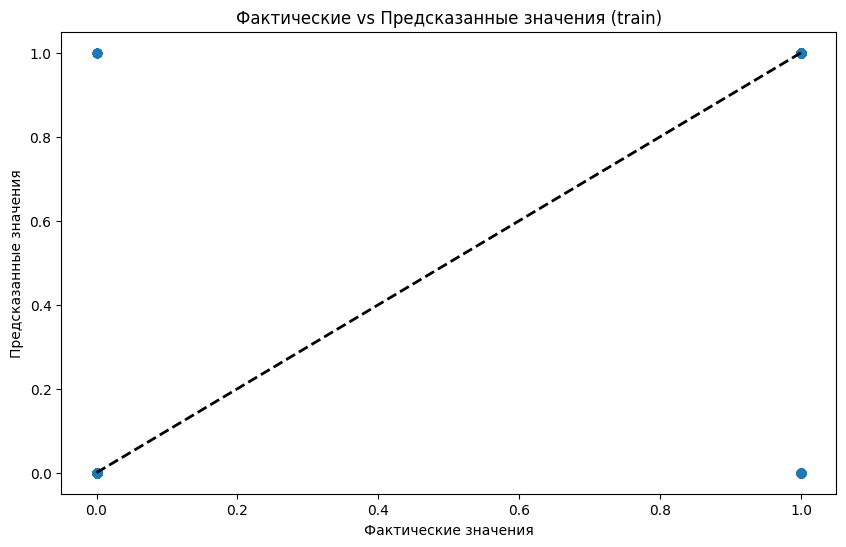

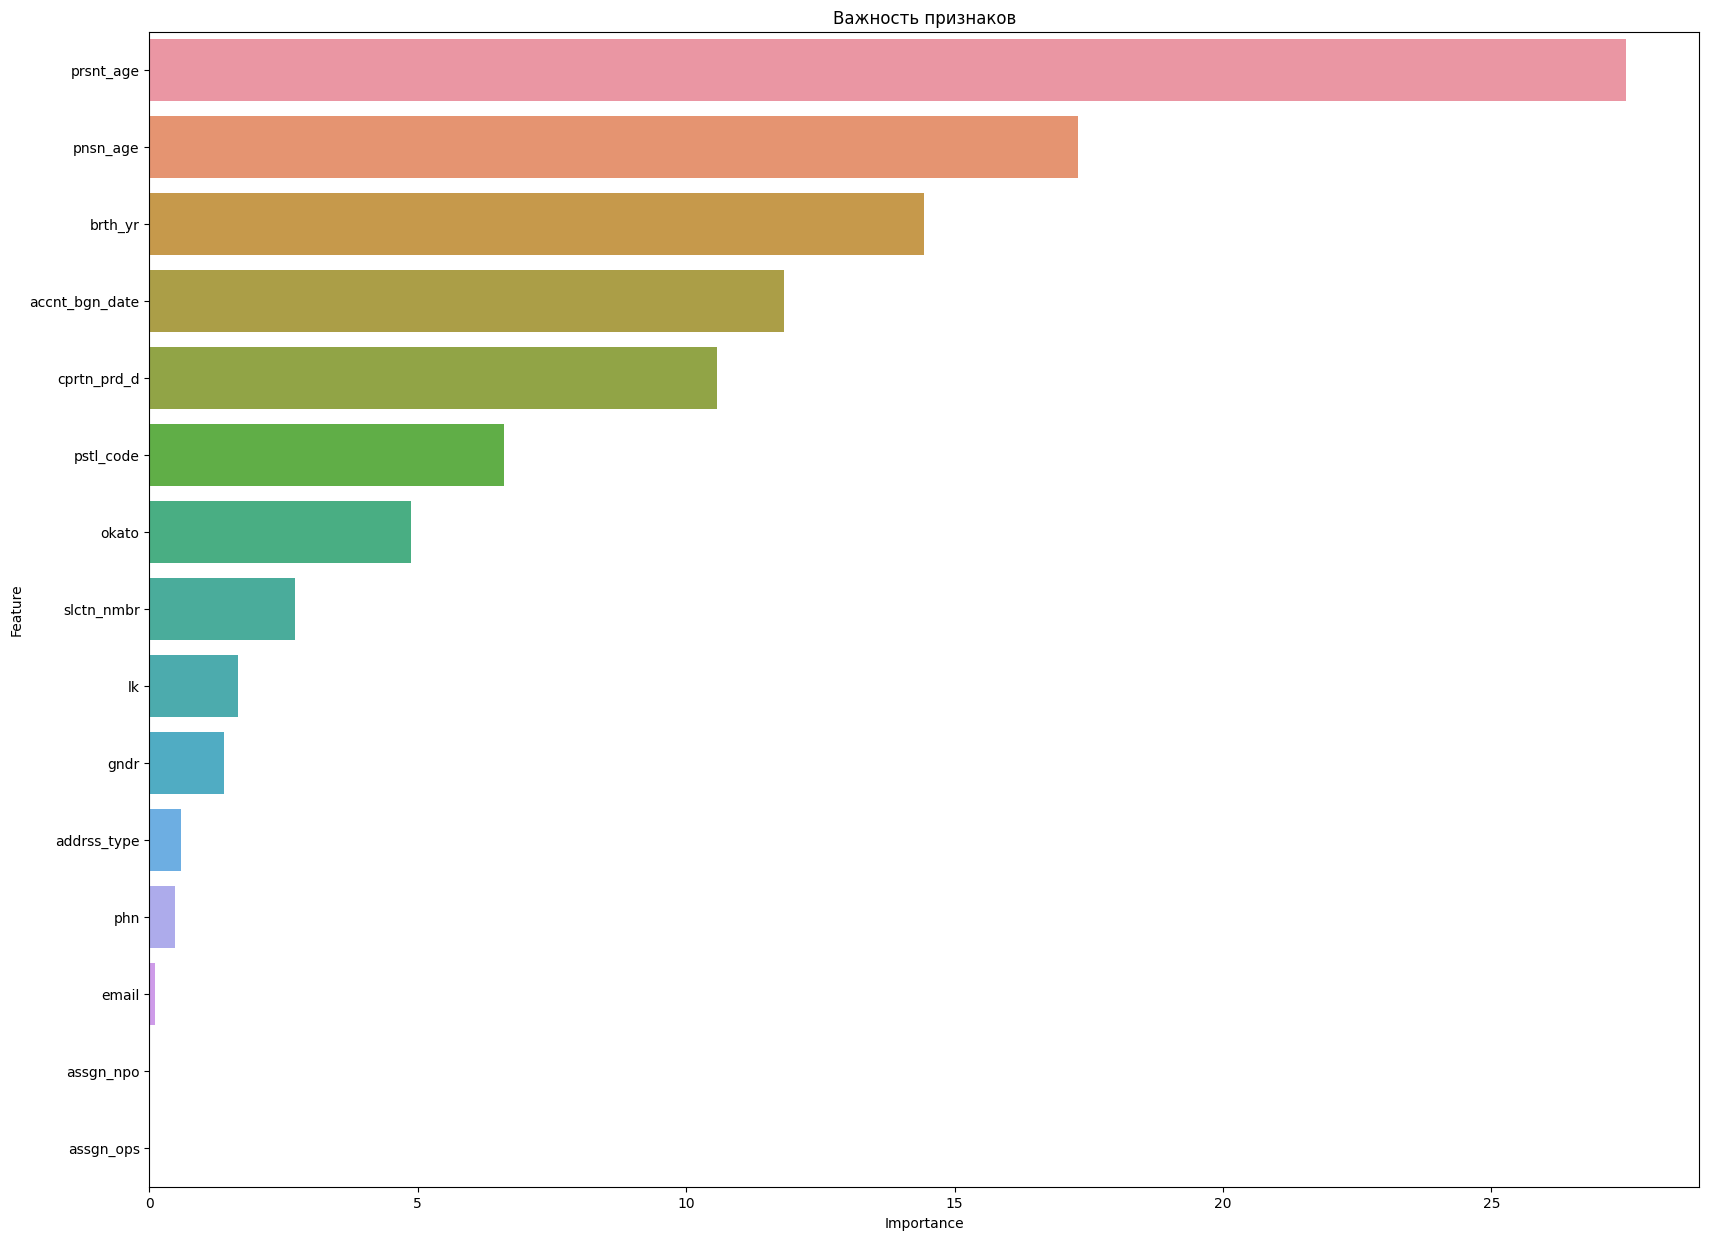

In [147]:
# Фактические vs Предсказанные значения (train)
plt.figure(figsize=(10, 6))
plt.scatter(y_train, model.predict(X_train))
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.title('Фактические vs Предсказанные значения (train)')
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.show()

# Оценка важности признаков
feature_importances = model.get_feature_importance()
feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(20, 15))
sb.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Важность признаков')
plt.show()

Обучение базовой модели: Модель CatBoostClassifier инициализируется с параметрами iterations, learning_rate, и depth, а также cat_features для указания категориальных признаков. Обучение модели выполняется с использованием функции потерь Logloss.
Оценка модели: Метрики f1, roc_auc_score, gini, precision, и recall вычисляются для оценки качества предсказаний модели.
Построение важности признаков: Выводится график с важностью признаков модели с использованием библиотеки seaborn.
Grid Search для настройки гиперпараметров: GridSearchCV применяется для поиска оптимальных значений гиперпараметров iterations, depth, и learning_rate.
Повторная оценка с лучшей моделью: Оценивается лучшая модель с оптимальными параметрами, выводится отчет о классификации и основные метрики.

In [148]:
# Определение параметров и модели
params = {
    'iterations': [500, 1000],
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.1, 0.2],
    'loss_function': ['Logloss']
}

# Определение категориальных признаков
cat_features = [X_train.columns.get_loc(col) for col in categorical_columns if col in X_train.columns]

# Создание и обучение модели
model = CatBoostClassifier(cat_features=categorical_columns)

# Обучение модели с использованием GridSearchCV для подбора гиперпараметров
grid_search = GridSearchCV(estimator=model, param_grid=params, cv=3, scoring='f1', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Выбор и обучение лучшей модели с оптимальными параметрами
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
0:	learn: 0.6579131	total: 144ms	remaining: 1m 12s
1:	learn: 0.6154391	total: 372ms	remaining: 1m 32s
2:	learn: 0.5777443	total: 717ms	remaining: 1m 58s
3:	learn: 0.5438164	total: 923ms	remaining: 1m 54s
4:	learn: 0.5116149	total: 1.27s	remaining: 2m 5s
5:	learn: 0.4850780	total: 1.4s	remaining: 1m 55s
6:	learn: 0.4525342	total: 1.59s	remaining: 1m 51s
7:	learn: 0.4246894	total: 1.75s	remaining: 1m 47s
8:	learn: 0.3982115	total: 2.03s	remaining: 1m 50s
9:	learn: 0.3742790	total: 2.24s	remaining: 1m 49s
10:	learn: 0.3511833	total: 2.38s	remaining: 1m 46s
11:	learn: 0.3288659	total: 2.55s	remaining: 1m 43s
12:	learn: 0.3084724	total: 2.74s	remaining: 1m 42s
13:	learn: 0.2893860	total: 2.89s	remaining: 1m 40s
14:	learn: 0.2718008	total: 3.06s	remaining: 1m 39s
15:	learn: 0.2554094	total: 3.24s	remaining: 1m 38s
16:	learn: 0.2392157	total: 3.43s	remaining: 1m 37s
17:	learn: 0.2243785	total: 3.64s	remaining: 1m 37s
18:	learn: 0.21

In [149]:
# Предсказания и оценка на тестовом наборе
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Пересчет метрик для лучшей модели
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
gini = 2 * roc_auc - 1
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Вывод результатов для лучшей модели
print(f"\nЛучшие параметры: {grid_search.best_params_}")
print(f"F1: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")
print(f"Gini: {gini:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

# Отчет о классификации
print("\nClassification Report (Best Model):")
print(classification_report(y_test, y_pred))


Лучшие параметры: {'depth': 6, 'iterations': 500, 'learning_rate': 0.01, 'loss_function': 'Logloss'}
F1: 1.00
ROC AUC: 1.00
Gini: 1.00
Precision: 1.00
Recall: 0.99

Classification Report (Best Model):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     51214
           1       1.00      0.99      1.00      1974

    accuracy                           1.00     53188
   macro avg       1.00      1.00      1.00     53188
weighted avg       1.00      1.00      1.00     53188


In [ ]:
submission = pd.DataFrame({'reco_id_curr': test['reco_id_curr'], 'target': model.predict_proba(X_test)[:, 1]}).set_index('reco_id_curr')
submission.to_csv('answer.csv')